In [1]:
# Import data from Excel sheet
import pandas as pd
df = pd.read_excel('aibl_ptdemog_final.xlsx', sheet_name='aibl_ptdemog_final')
#print(df)
sid = df['RID']
grp = df['DXCURREN']
age = df['age']
sex = df['PTGENDER(1=Male)']
tiv = df['Total'] # TIV
field = df['field_strength']
grpbin = (grp > 1) # 1=CN, ...

In [2]:
# Scan for nifti file names
import glob
dataAIBL = sorted(glob.glob('mwp1_MNI_AIBL/*.nii.gz'))
dataFiles = dataAIBL
numfiles = len(dataFiles)
print('Found ', str(numfiles), ' nifti files')

Found  606  nifti files


In [3]:
# Match covariate information
import re
debug = False
cov_idx = [-1] * numfiles # list; array: np.full((numfiles, 1), -1, dtype=int)
print('Matching covariates for loaded files ...')
for i,id in enumerate(sid):
  p = [j for j,x in enumerate(dataFiles) if re.search('_%d_MR_' % id, x)] # extract ID numbers from filename, translate to Excel row index
  if len(p)==0:
    if debug: print('Did not find %04d' % id) # did not find Excel sheet subject ID in loaded file selection
  else:
    if debug: print('Found %04d in %s: %s' % (id, p[0], dataFiles[p[0]]))
    cov_idx[p[0]] = i # store Excel index i for data file index p[0]
print('Checking for scans not found in Excel sheet: ', sum(x<0 for x in cov_idx))

labels = pd.DataFrame({'Group':grpbin}).iloc[cov_idx, :]
grps = pd.DataFrame({'Group':grp, 'RID':sid}).iloc[cov_idx, :]

Matching covariates for loaded files ...
Checking for scans not found in Excel sheet:  0


In [5]:
# Load residualized data from disk
import h5py
import numpy as np
from pandas import DataFrame
from keras.utils import to_categorical
hf = h5py.File('orig_images_wb_mwp1_MNI_AIBL.hdf5', 'r')
hf.keys # read keys
#labels = np.array(hf.get('labels')) # note: was of data frame type before
images = np.array(hf.get('images'))
hf.close()
labels = to_categorical(np.asarray(labels)) # use grps to access original labels
print(images.shape)

Using TensorFlow backend.


(606, 100, 100, 120, 1)


In [6]:
# specify version of tensorflow
#%tensorflow_version 1.x
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# disable tensorflow deprecation warnings
import logging
logging.getLogger('tensorflow').disabled=True
# downgrade to specific version
#!pip install tensorflow-gpu==1.15
#import tensorflow as tf
#print(tf.__version__)
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
    # device_count = {'GPU': 1}
)
config.gpu_options.allow_growth = False #True
session = tf.Session(config=config)
set_session(session)

1.15.0


validating model newmodel_rawdata_pretrained/newmodel_wb_cv1.hdf5
Test accuracy: 62.21 %


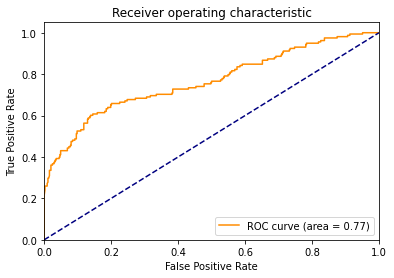

Optimal prediction threshold: 0.96703
Optimal prediction threshold: 0.99054
AUC for MCI vs. CN = 0.69
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.694
AUC for AD vs. CN = 0.876
Acc for MCI vs. CN = 59.0
Acc for AD vs. CN = 62.4
confusion matrix (naive)
[[262 186]
 [ 37  59]
 [  6  56]]
oAcc for MCI vs. CN = 75.7
oAcc for AD vs. CN = 84.3
confusion matrix (optimized)
[[358  90]
 [ 42  54]
 [ 13  49]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv2.hdf5
Test accuracy: 80.03 %


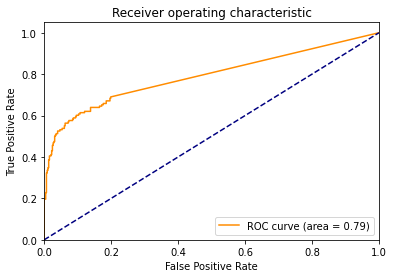

Optimal prediction threshold: 0.66303
Optimal prediction threshold: 0.79105
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.696
AUC for AD vs. CN = 0.934
Acc for MCI vs. CN = 79.4
Acc for AD vs. CN = 86.1
confusion matrix (naive)
[[386  62]
 [ 50  46]
 [  9  53]]
oAcc for MCI vs. CN = 82.0
oAcc for AD vs. CN = 92.2
confusion matrix (optimized)
[[402  46]
 [ 52  44]
 [ 11  51]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv3.hdf5
Test accuracy: 62.21 %


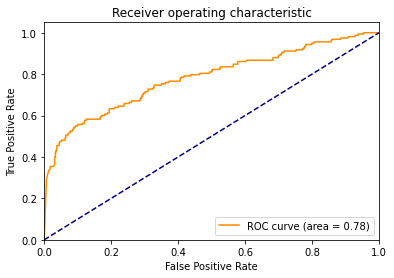

Optimal prediction threshold: 0.99653
Optimal prediction threshold: 0.99931
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.90
AUC for MCI vs. CN = 0.702
AUC for AD vs. CN = 0.902
Acc for MCI vs. CN = 58.6
Acc for AD vs. CN = 60.8
confusion matrix (naive)
[[252 196]
 [ 29  67]
 [  4  58]]
oAcc for MCI vs. CN = 80.0
oAcc for AD vs. CN = 89.4
confusion matrix (optimized)
[[394  54]
 [ 55  41]
 [ 14  48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv4.hdf5
Test accuracy: 65.51 %


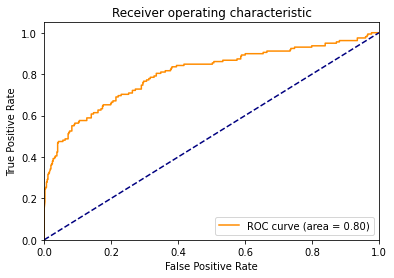

Optimal prediction threshold: 0.72780
Optimal prediction threshold: 0.97224
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.721
AUC for AD vs. CN = 0.931
Acc for MCI vs. CN = 61.8
Acc for AD vs. CN = 63.7
confusion matrix (naive)
[[264 184]
 [ 24  72]
 [  1  61]]
oAcc for MCI vs. CN = 66.9
oAcc for AD vs. CN = 84.1
confusion matrix (optimized)
[[298 150]
 [ 30  66]
 [  2  60]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv5.hdf5
Test accuracy: 61.39 %


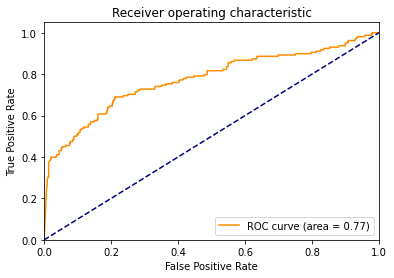

Optimal prediction threshold: 0.98689
Optimal prediction threshold: 0.98678
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.697
AUC for AD vs. CN = 0.893
Acc for MCI vs. CN = 57.7
Acc for AD vs. CN = 59.8
confusion matrix (naive)
[[247 201]
 [ 29  67]
 [  4  58]]
oAcc for MCI vs. CN = 74.8
oAcc for AD vs. CN = 79.8
confusion matrix (optimized)
[[354  94]
 [ 43  53]
 [  8  54]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv6.hdf5
Test accuracy: 64.19 %


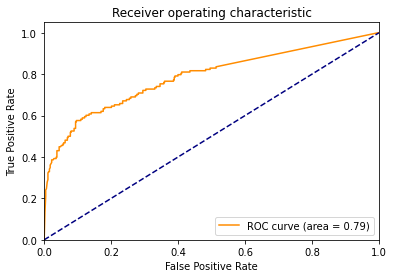

Optimal prediction threshold: 0.99956
Optimal prediction threshold: 0.99819
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.699
AUC for AD vs. CN = 0.922
Acc for MCI vs. CN = 60.5
Acc for AD vs. CN = 62.9
confusion matrix (naive)
[[261 187]
 [ 28  68]
 [  2  60]]
oAcc for MCI vs. CN = 82.2
oAcc for AD vs. CN = 86.9
confusion matrix (optimized)
[[406  42]
 [ 55  41]
 [ 17  45]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv7.hdf5
Test accuracy: 58.25 %


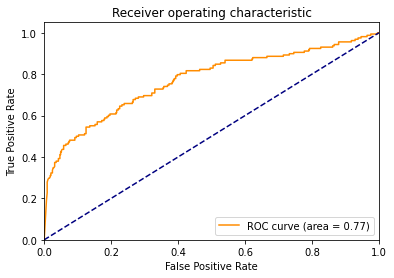

Optimal prediction threshold: 0.99333
Optimal prediction threshold: 0.99935
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.696
AUC for AD vs. CN = 0.884
Acc for MCI vs. CN = 54.0
Acc for AD vs. CN = 54.5
confusion matrix (naive)
[[219 229]
 [ 21  75]
 [  3  59]]
oAcc for MCI vs. CN = 72.2
oAcc for AD vs. CN = 85.7
confusion matrix (optimized)
[[341 107]
 [ 44  52]
 [ 11  51]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv8.hdf5
Test accuracy: 55.94 %


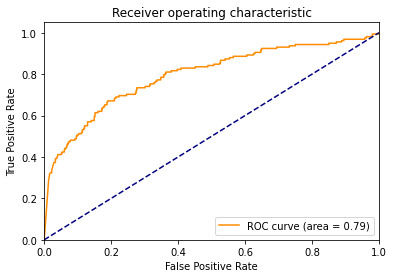

Optimal prediction threshold: 0.95245
Optimal prediction threshold: 0.99653
AUC for MCI vs. CN = 0.73
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.732
AUC for AD vs. CN = 0.890
Acc for MCI vs. CN = 51.7
Acc for AD vs. CN = 50.8
confusion matrix (naive)
[[201 247]
 [ 16  80]
 [  4  58]]
oAcc for MCI vs. CN = 65.4
oAcc for AD vs. CN = 79.4
confusion matrix (optimized)
[[286 162]
 [ 26  70]
 [  6  56]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv9.hdf5
Test accuracy: 54.79 %


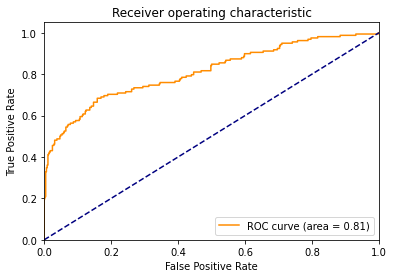

Optimal prediction threshold: 0.96039
Optimal prediction threshold: 0.98228
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.742
AUC for AD vs. CN = 0.918
Acc for MCI vs. CN = 50.2
Acc for AD vs. CN = 49.6
confusion matrix (naive)
[[194 254]
 [ 17  79]
 [  3  59]]
oAcc for MCI vs. CN = 77.6
oAcc for AD vs. CN = 87.5
confusion matrix (optimized)
[[368  80]
 [ 42  54]
 [  7  55]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv10.hdf5
Test accuracy: 59.41 %


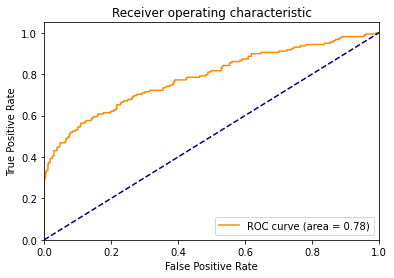

Optimal prediction threshold: 0.99323
Optimal prediction threshold: 0.98215
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.719
AUC for AD vs. CN = 0.885
Acc for MCI vs. CN = 56.1
Acc for AD vs. CN = 56.9
confusion matrix (naive)
[[235 213]
 [ 26  70]
 [  7  55]]
oAcc for MCI vs. CN = 81.1
oAcc for AD vs. CN = 83.5
confusion matrix (optimized)
[[399  49]
 [ 54  42]
 [ 16  46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv11.hdf5
Test accuracy: 61.88 %


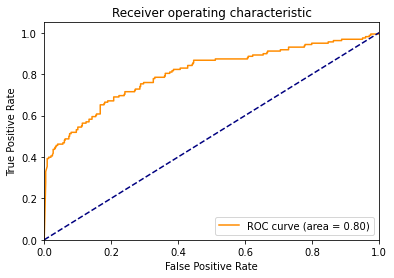

Optimal prediction threshold: 0.87013
Optimal prediction threshold: 0.99993
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.737
AUC for AD vs. CN = 0.906
Acc for MCI vs. CN = 58.3
Acc for AD vs. CN = 58.0
confusion matrix (naive)
[[238 210]
 [ 17  79]
 [  4  58]]
oAcc for MCI vs. CN = 67.5
oAcc for AD vs. CN = 91.4
confusion matrix (optimized)
[[300 148]
 [ 29  67]
 [  6  56]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv12.hdf5
Test accuracy: 62.05 %


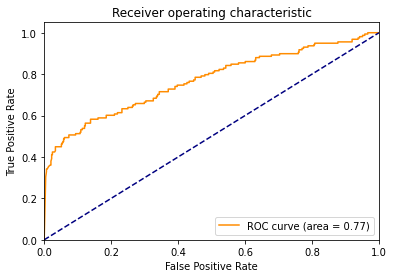

Optimal prediction threshold: 0.99806
Optimal prediction threshold: 0.99997
AUC for MCI vs. CN = 0.69
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.688
AUC for AD vs. CN = 0.892
Acc for MCI vs. CN = 58.6
Acc for AD vs. CN = 61.4
confusion matrix (naive)
[[256 192]
 [ 33  63]
 [  5  57]]
oAcc for MCI vs. CN = 78.9
oAcc for AD vs. CN = 91.4
confusion matrix (optimized)
[[386  62]
 [ 53  43]
 [ 14  48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv13.hdf5
Test accuracy: 59.08 %


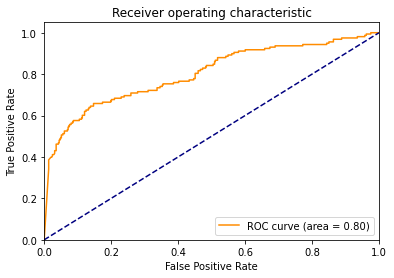

Optimal prediction threshold: 0.99790
Optimal prediction threshold: 0.99882
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.90
AUC for MCI vs. CN = 0.738
AUC for AD vs. CN = 0.900
Acc for MCI vs. CN = 55.0
Acc for AD vs. CN = 55.7
confusion matrix (naive)
[[225 223]
 [ 22  74]
 [  3  59]]
oAcc for MCI vs. CN = 79.6
oAcc for AD vs. CN = 87.3
confusion matrix (optimized)
[[382  66]
 [ 45  51]
 [ 10  52]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv14.hdf5
Test accuracy: 63.86 %


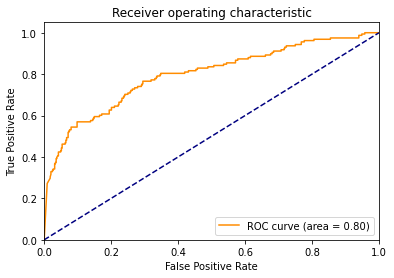

Optimal prediction threshold: 0.91910
Optimal prediction threshold: 0.99988
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.89
AUC for MCI vs. CN = 0.736
AUC for AD vs. CN = 0.888
Acc for MCI vs. CN = 60.8
Acc for AD vs. CN = 62.0
confusion matrix (naive)
[[260 188]
 [ 25  71]
 [  6  56]]
oAcc for MCI vs. CN = 70.0
oAcc for AD vs. CN = 90.4
confusion matrix (optimized)
[[316 132]
 [ 31  65]
 [  7  55]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv15.hdf5
Test accuracy: 51.32 %


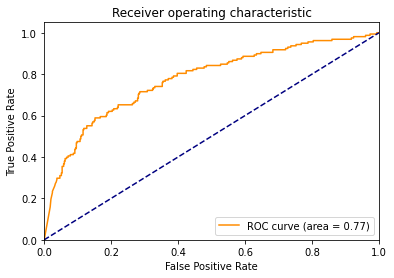

Optimal prediction threshold: 0.96172
Optimal prediction threshold: 0.99961
AUC for MCI vs. CN = 0.71
AUC for AD vs. CN = 0.88
AUC for MCI vs. CN = 0.706
AUC for AD vs. CN = 0.881
Acc for MCI vs. CN = 46.3
Acc for AD vs. CN = 45.1
confusion matrix (naive)
[[171 277]
 [ 15  81]
 [  3  59]]
oAcc for MCI vs. CN = 62.5
oAcc for AD vs. CN = 84.7
confusion matrix (optimized)
[[270 178]
 [ 26  70]
 [  6  56]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv16.hdf5
Test accuracy: 45.71 %


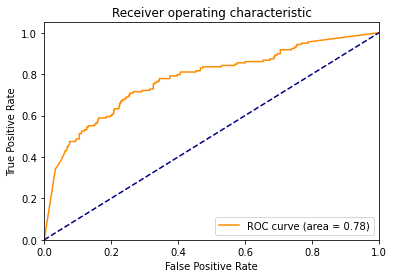

Optimal prediction threshold: 0.99453
Optimal prediction threshold: 0.99948
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.90
AUC for MCI vs. CN = 0.696
AUC for AD vs. CN = 0.901
Acc for MCI vs. CN = 39.7
Acc for AD vs. CN = 37.8
confusion matrix (naive)
[[132 316]
 [ 12  84]
 [  1  61]]
oAcc for MCI vs. CN = 66.2
oAcc for AD vs. CN = 78.6
confusion matrix (optimized)
[[297 151]
 [ 33  63]
 [  5  57]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv17.hdf5
Test accuracy: 77.89 %


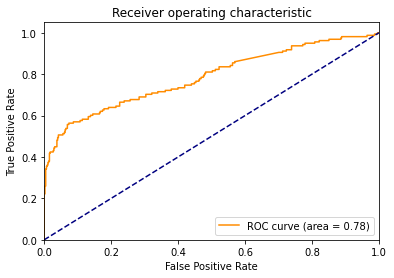

Optimal prediction threshold: 0.71589
Optimal prediction threshold: 0.75714
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.703
AUC for AD vs. CN = 0.910
Acc for MCI vs. CN = 77.0
Acc for AD vs. CN = 84.1
confusion matrix (naive)
[[376  72]
 [ 53  43]
 [  9  53]]
oAcc for MCI vs. CN = 83.3
oAcc for AD vs. CN = 91.8
confusion matrix (optimized)
[[415  33]
 [ 58  38]
 [ 12  50]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv18.hdf5
Test accuracy: 60.73 %


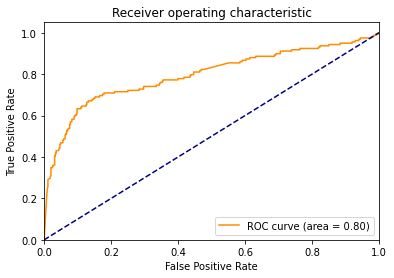

Optimal prediction threshold: 0.95770
Optimal prediction threshold: 0.98316
AUC for MCI vs. CN = 0.72
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.717
AUC for AD vs. CN = 0.916
Acc for MCI vs. CN = 57.2
Acc for AD vs. CN = 58.2
confusion matrix (naive)
[[240 208]
 [ 25  71]
 [  5  57]]
oAcc for MCI vs. CN = 77.6
oAcc for AD vs. CN = 86.3
confusion matrix (optimized)
[[368  80]
 [ 42  54]
 [  5  57]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv19.hdf5
Test accuracy: 72.61 %


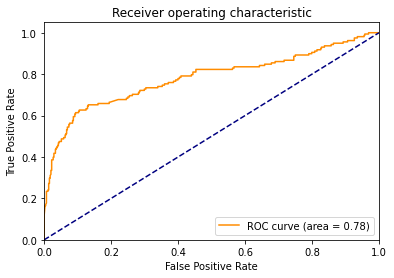

Optimal prediction threshold: 0.91312
Optimal prediction threshold: 0.97054
AUC for MCI vs. CN = 0.69
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.687
AUC for AD vs. CN = 0.926
Acc for MCI vs. CN = 70.2
Acc for AD vs. CN = 75.9
confusion matrix (naive)
[[329 119]
 [ 43  53]
 [  4  58]]
oAcc for MCI vs. CN = 80.3
oAcc for AD vs. CN = 90.6
confusion matrix (optimized)
[[390  58]
 [ 49  47]
 [  8  54]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv20.hdf5
Test accuracy: 68.81 %


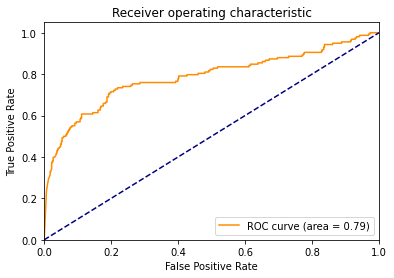

Optimal prediction threshold: 0.94348
Optimal prediction threshold: 0.96046
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.702
AUC for AD vs. CN = 0.916
Acc for MCI vs. CN = 65.8
Acc for AD vs. CN = 69.8
confusion matrix (naive)
[[297 151]
 [ 35  61]
 [  3  59]]
oAcc for MCI vs. CN = 74.8
oAcc for AD vs. CN = 81.6
confusion matrix (optimized)
[[350  98]
 [ 39  57]
 [  4  58]]


In [7]:
# Split data into training/validation and holdout test data
from sklearn.model_selection import StratifiedKFold,train_test_split
import numpy as np
import gc
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # model will be trained on GPU 0

import keras
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.optimizers import Adam
from keras import initializers
from keras.callbacks import EarlyStopping
import tensorflow as tf
from statistics import mean,stdev
from sklearn.metrics import confusion_matrix

acc_test, auc_test, auc_AD, auc_MCI = [], [], [], []
acc_AD, acc_MCI, opt_acc_AD, opt_acc_MCI = [], [], [], []

num_kfold = 20 # number of cross-validation loops equal to number of models
batch_size = 8

for k in range(num_kfold):
    gc.collect()
    print('validating model newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    mymodel = models.load_model('newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    
    # Calculate accuracy for validation data
    #scores = mymodel.evaluate(images, labels, batch_size=batch_size) #, verbose=0
    #print("Test %s: %.2f%%" % (mymodel.metrics_names[1], scores[1]*100))
    #acc_test.append(scores[1]*100)
    
    # calculate area under the curve
    # AUC as optimization function during training: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
    pred = mymodel.predict(images, batch_size=batch_size)
    acc_all = np.mean((labels[:, 1] == np.round(pred[:, 1])).astype(int))*100
    print("Test accuracy: %.2f %%" % acc_all)
    acc_test.append(acc_all)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    acc = dict()
    opt_acc = dict()
    thresh = dict()
    for i in range(2): # classes dummy vector: 0 - CN, 1 - MCI/AD
        fpr[i], tpr[i], _ = roc_curve(labels[:, i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    auc_test.append(roc_auc[1])
    
    # redo AUC for binary comparison: AD vs. HC and MCI vs. HC
    for i in [2,3]:
      grpi = np.equal(grps.Group.to_numpy(dtype=np.int), np.ones((grps.shape[0],), dtype=np.int)*i)
      grp1 = np.equal(grps.Group.to_numpy(dtype=np.int), np.ones((grps.shape[0],), dtype=np.int))
      grpidx = np.logical_or(grpi, grp1)
      fpr[i], tpr[i], thresholds = roc_curve(labels[grpidx, 1], pred[grpidx, 1])
      roc_auc[i] = auc(fpr[i], tpr[i])
      thresh[i] = thresholds[np.argmax(tpr[i] - fpr[i])]
      print('Optimal prediction threshold: %0.5f' % thresh[i])
      acc[i] = np.mean((labels[grpidx, 1] == np.round(pred[grpidx, 1])).astype(int))*100
      opt_acc[i] = np.mean((labels[grpidx, 1] == (pred[grpidx, 1]>thresh[i]).astype(int)).astype(int))*100

    print('AUC for MCI vs. CN = %0.2f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.2f' % roc_auc[3])
    auc_AD.append(roc_auc[3])
    auc_MCI.append(roc_auc[2])
    acc_AD.append(acc[3])
    acc_MCI.append(acc[2])
    opt_acc_AD.append(opt_acc[3])
    opt_acc_MCI.append(opt_acc[2])
    
    print('AUC for MCI vs. CN = %0.3f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.3f' % roc_auc[3])
    print('Acc for MCI vs. CN = %0.1f' % acc[2])
    print('Acc for AD vs. CN = %0.1f' % acc[3])
    print('confusion matrix (naive)')
    confmat = confusion_matrix(grps.Group-1, np.round(pred[:, 1]))
    print(confmat[:,(0,1)])
    print('oAcc for MCI vs. CN = %0.1f' % opt_acc[2])
    print('oAcc for AD vs. CN = %0.1f' % opt_acc[3])
    print('confusion matrix (optimized)')
    confmat = confusion_matrix(grps.Group-1, (pred[:, 1]>thresh[2]).astype(int)) ## use MCI threshold
    print(confmat[:,(0,1)])

In [8]:
# print model performance summary
from statistics import mean,stdev
print('Acc for all test data = %0.1f +/- %0.1f' % (mean(acc_test), stdev(acc_test)))
print('AUC for all test data = %0.3f +/- %0.3f' % (mean(auc_test), stdev(auc_test)))
print('AUC for MCI vs. CN = %0.3f +/- %0.3f' % (mean(auc_MCI), stdev(auc_MCI)))
print('AUC for AD vs. CN = %0.3f +/- %0.3f' % (mean(auc_AD), stdev(auc_AD)))
print('Mean Acc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(acc_MCI), stdev(acc_MCI)))
print('Mean Acc for AD vs. CN = %0.1f +/- %0.1f' % (mean(acc_AD), stdev(acc_AD)))
print('Mean oAcc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_MCI), stdev(opt_acc_MCI)))
print('Mean oAcc for AD vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_AD), stdev(opt_acc_AD)))

Acc for all test data = 62.4 +/- 8.1
AUC for all test data = 0.786 +/- 0.013
AUC for MCI vs. CN = 0.710 +/- 0.018
AUC for AD vs. CN = 0.904 +/- 0.018
Mean Acc for MCI vs. CN = 58.9 +/- 9.3
Mean Acc for AD vs. CN = 60.8 +/- 11.7
Mean oAcc for MCI vs. CN = 74.9 +/- 6.4
Mean oAcc for AD vs. CN = 86.3 +/- 4.3


In [9]:
results = pd.DataFrame({'Accuracy_Test':acc_test, 'AUC_Test':auc_test, 'AUC_MCI':auc_MCI, 'AUC_AD':auc_AD,
                        'Acc_MCI':acc_MCI, 'Acc_AD':acc_AD,
                        'Opt_acc_MCI':opt_acc_MCI, 'Opt_acc_AD':opt_acc_AD})
print(results)

    Accuracy_Test  AUC_Test   AUC_MCI    AUC_AD    Acc_MCI     Acc_AD  \
0       62.211221  0.765547  0.694475  0.875594  59.007353  62.352941   
1       80.033003  0.789409  0.695836  0.934296  79.411765  86.078431   
2       62.211221  0.780339  0.701776  0.901984  58.639706  60.784314   
3       65.511551  0.803317  0.720610  0.931380  61.764706  63.725490   
4       61.386139  0.774052  0.696928  0.893469  57.720588  59.803922   
5       64.191419  0.786188  0.698754  0.921569  60.477941  62.941176   
6       58.250825  0.770019  0.696347  0.884091  54.044118  54.509804   
7       55.940594  0.794226  0.732352  0.890031  51.654412  50.784314   
8       54.785479  0.811236  0.742432  0.917771  50.183824  49.607843   
9       59.405941  0.784118  0.719110  0.884775  56.066176  56.862745   
10      61.881188  0.803649  0.737328  0.906340  58.272059  58.039216   
11      62.046205  0.767977  0.688012  0.891795  58.639706  61.372549   
12      59.075908  0.801608  0.737886  0.900274  54